In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Data Wrangling
## Gathering Data

In [2]:
#read file 'KaggleV2-May-2016.csv' :
original_df=pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
df=original_df.copy()
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Assess
#### Quality
##### -`PatientId`,`AppointmentID`,`Scholarship`, `Hipertension`,`Diabetes`, `Alcoholism`, `Handcap` and `SMS_received` they should be convert from integer to string becoase I won`t do calculations on them
##### - rename `AppointmentID` to 'AppointmentId'
##### - rename `No-show` to `NoShow`
##### - rename `SMS_received`to `SMSReceived`
##### -`Gender`and `No-show` should be catogary type
##### -`ScheduledDay` and `AppointmentDay` should be DatetimeIndex type
##### - Patient whose AppointmentId =5775010 his age is -1 and is not true
##### - Handicap` has five different values(0,1,2,3,4) so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped

In [3]:
df.shape

(110527, 14)

In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
columns=[ 'Gender','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for col in columns:
    print(col,df[col].unique())

Gender ['F' 'M']
Scholarship [0 1]
Hipertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
Handcap [0 1 2 3 4]
SMS_received [0 1]
No-show ['No' 'Yes']


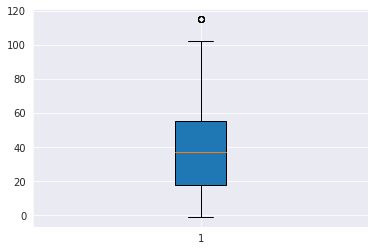

In [6]:
plt.boxplot(df['Age'],patch_artist=True);

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### clean data

In [9]:
#Handicap column has five different values(0,1,2,3,4) so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped
def replace_value(num):
    if num>0 :
        return 1
    else:
        return 0
df['Handcap']=df['Handcap'].apply(replace_value)
df.Handcap.unique()

array([0, 1])

In [10]:
#delet patiend whose age =-1
df.drop([99832],axis=0,inplace=True)
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
df.rename(columns={'AppointmentID':'AppointmentId'},inplace=True)
df.rename(columns={'No-show':'NoShow'},inplace=True)
df.rename(columns={'SMS_received':'SMSReceived'},inplace=True)

In [12]:
#convert to datetime type  
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d')
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

#convert to string type
integer_columns=['PatientId','AppointmentId','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMSReceived']
for col in integer_columns:
    df[col]=df[col].astype(str)
#convert to category type   
df['Gender']=df['Gender'].astype('category')  
df['NoShow']=df['NoShow'].astype('category') 

In [13]:
# number of days between choduled day and appointment day
df['DaysBetweenTowDates']=df['AppointmentDay']-df['ScheduledDay']
#add column day of appointment
df['Day']=df['AppointmentDay'].dt.day_name()
#add column day of week to appointment
df['Week']=df['AppointmentDay'].dt.isocalendar().week

In [14]:
#convert Day and week to categorical data
df['Day']=df['Day'].astype('category')
df['Week']=df['Week'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   PatientId            110526 non-null  object         
 1   AppointmentId        110526 non-null  object         
 2   Gender               110526 non-null  category       
 3   ScheduledDay         110526 non-null  datetime64[ns] 
 4   AppointmentDay       110526 non-null  datetime64[ns] 
 5   Age                  110526 non-null  int64          
 6   Neighbourhood        110526 non-null  object         
 7   Scholarship          110526 non-null  object         
 8   Hipertension         110526 non-null  object         
 9   Diabetes             110526 non-null  object         
 10  Alcoholism           110526 non-null  object         
 11  Handcap              110526 non-null  object         
 12  SMSReceived          110526 non-null  object         
 13 

In [16]:
df

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,DaysBetweenTowDates,Day,Week
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,Friday,17
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,Friday,17
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,Friday,17
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,Friday,17
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,Friday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days,Tuesday,23
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days,Tuesday,23
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days,Tuesday,23
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days,Tuesday,23


# Exploring Data

####  Lets first take a peek in count of show or no .

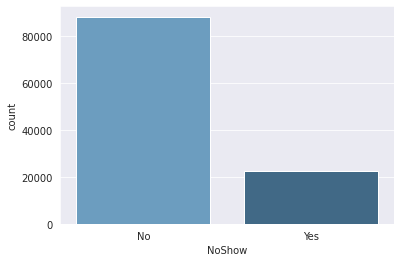

In [17]:
sns.countplot(x='NoShow',data=df,palette='Blues_d');

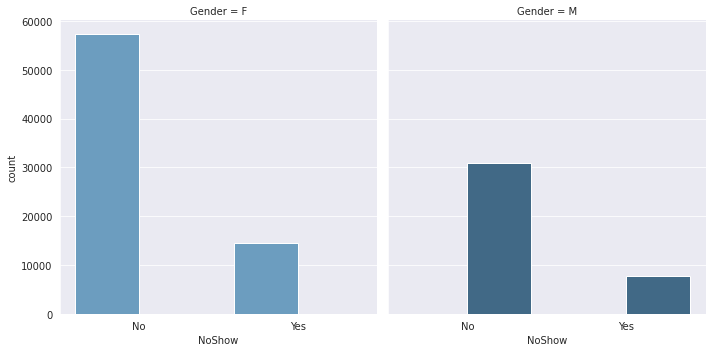

In [18]:
sns.catplot(x='NoShow',data=df,hue='Gender',palette='Blues_d',col='Gender',kind='count');

#### number of patients in Neighbourhood 

###### we want know which countries have large number of patient , it make us think about the reasons why this countries are full of patients and why patient not attend the appoientment

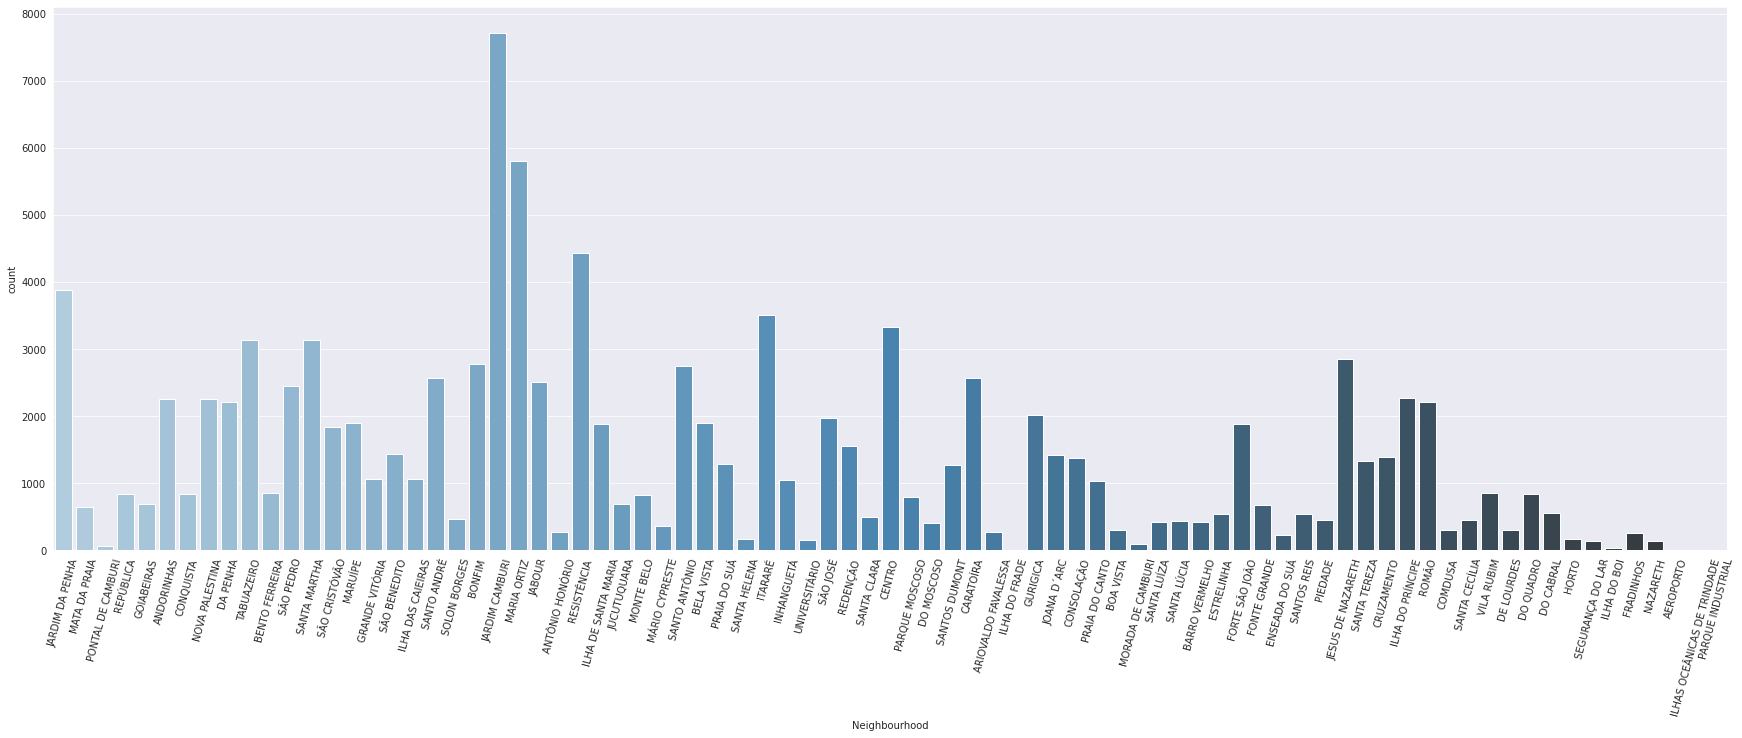

In [19]:
plt.figure(figsize=(30,10))
chart=sns.countplot(x='Neighbourhood',data=df,palette='Blues_d')
chart.set_xticklabels(chart.get_xticklabels(),rotation=75);

##### we notes that JARDIM CAMBURI and MARIA ORTIZ are most cities have patients

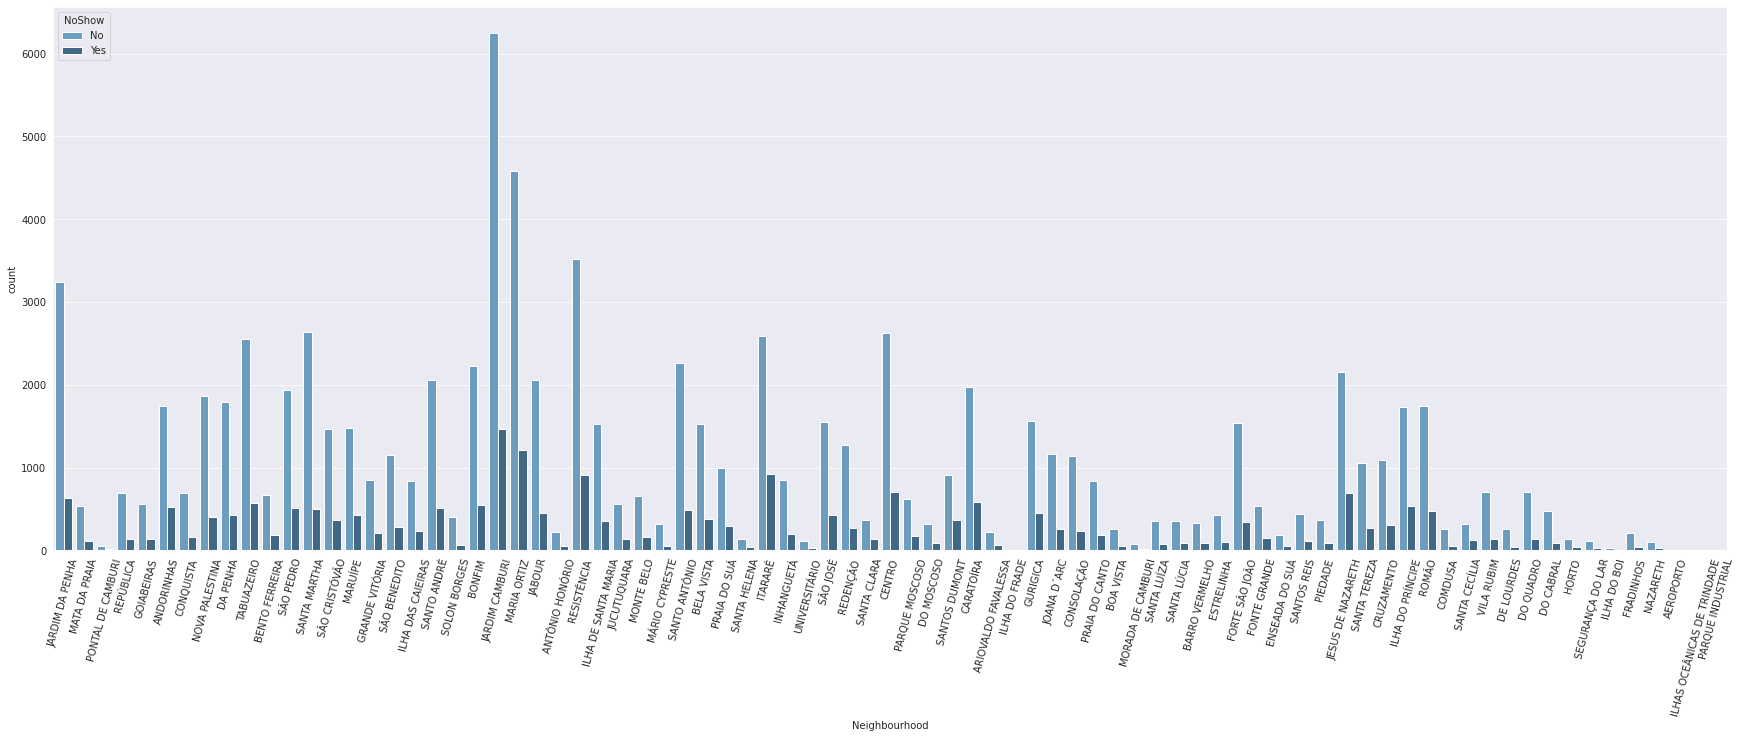

In [20]:
plt.figure(figsize=(30,10))
chart=sns.countplot(x='Neighbourhood',data=df,hue='NoShow',palette='Blues_d')
chart.set_xticklabels(chart.get_xticklabels(),rotation=75);

### 4) messages not sent to the patient and attend the appointment   VS   messages not sent to the patient and attend the appointment 

###### we want know if SMS helps patients to attend the appointment .

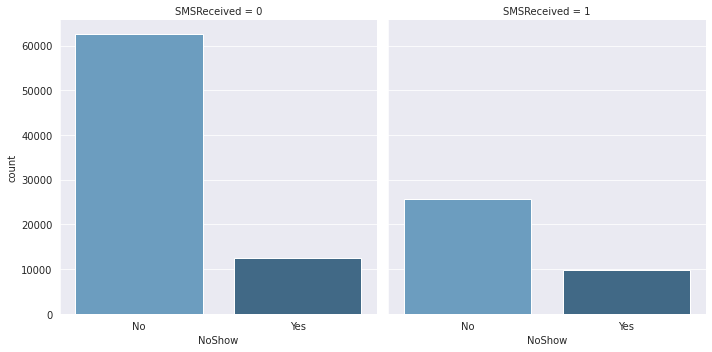

In [21]:
sns.catplot(x='NoShow',data=df,palette='Blues_d',col='SMSReceived',kind='count');

###### unfortunately SMS not help patients to attend the appointment

#### number of patient who suffers from Hipertension,Diabetes,Alcoholism and Handcap

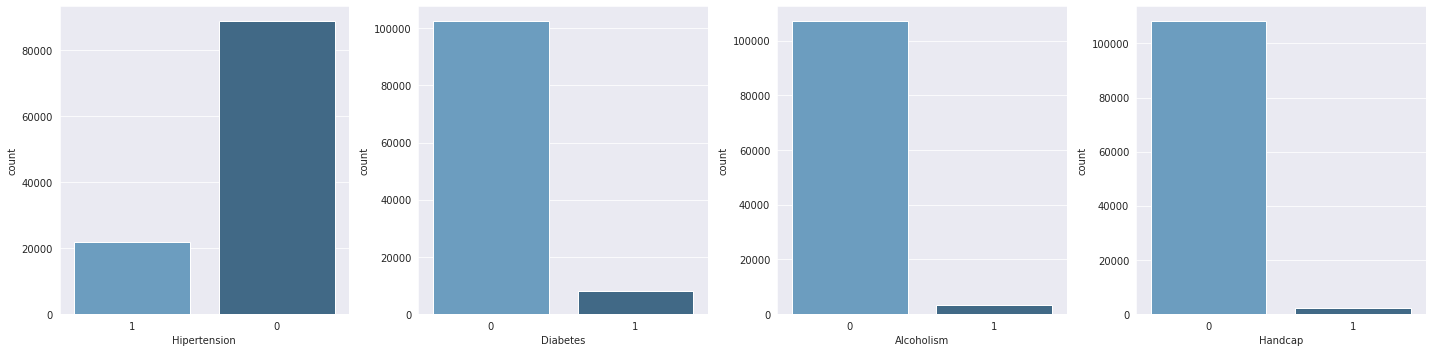

In [22]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
sns.countplot(x='Hipertension' ,data=df,palette='Blues_d',ax=ax[0])
sns.countplot(x='Diabetes' ,data=df,palette='Blues_d',ax=ax[1])
sns.countplot(x='Alcoholism' ,data=df,palette='Blues_d',ax=ax[2])
sns.countplot(x='Handcap' ,data=df,palette='Blues_d',ax=ax[3])
plt.tight_layout()


###### there are more patient suffers from Hipertension  

#### Do you attend the appointment depend on types of disease Hipertension,Diabetes,Alcoholism,Handcap ? 

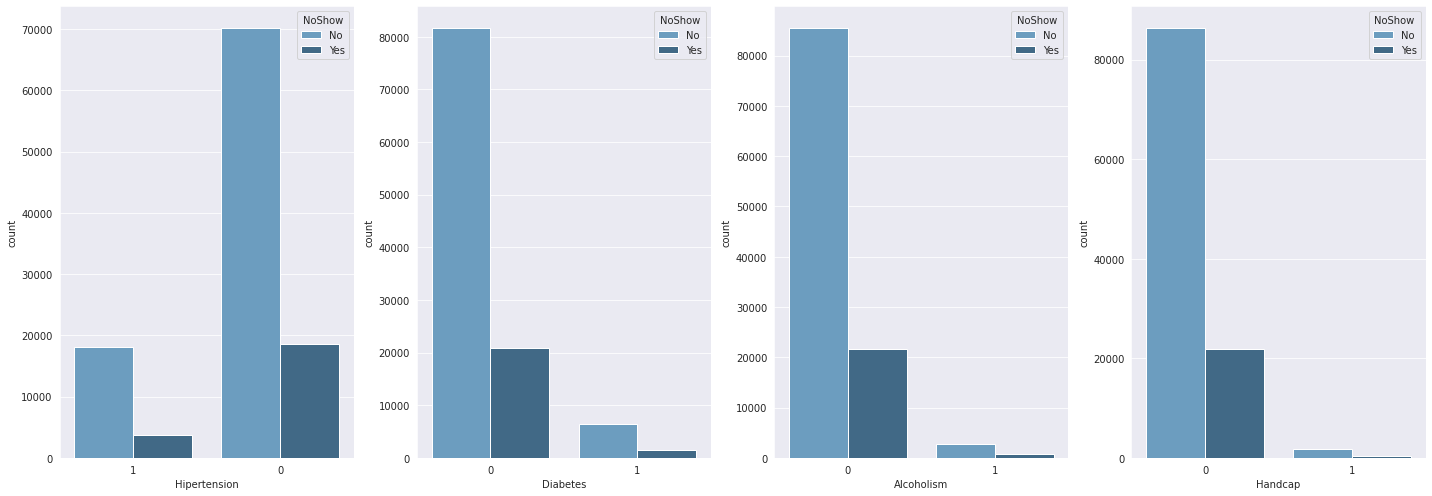

In [23]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,7))
sns.countplot(x='Hipertension' ,data=df,hue='NoShow',palette='Blues_d',ax=ax[0])
sns.countplot(x='Diabetes' ,data=df,hue='NoShow',palette='Blues_d',ax=ax[1])
sns.countplot(x='Alcoholism' ,data=df,hue='NoShow',palette='Blues_d',ax=ax[2])
sns.countplot(x='Handcap' ,data=df,hue='NoShow',palette='Blues_d',ax=ax[3])
plt.tight_layout()

###### The patient who suffers from Hipertension and attended the appointment  82.7% 
###### The patient who suffers from Diabetes and attended the appointment  82% 
###### The patient who suffers from Alcoholism and attended the appointment  80%
###### The patient who suffers from Handcap and attended the appointment  82%

### 7)number of male and female

F    71839
M    38687
Name: Gender, dtype: int64


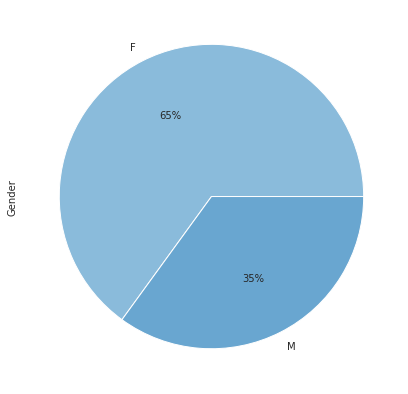

In [24]:
palette_color = sns.color_palette('Blues_d')
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='pie',autopct='%1.f%%',colors=palette_color,figsize=(7,7));

###### it is clear to say that women takes way more care of they health in comparison to men

 Age of patient

###### we want to know the distribution of age to men and women 

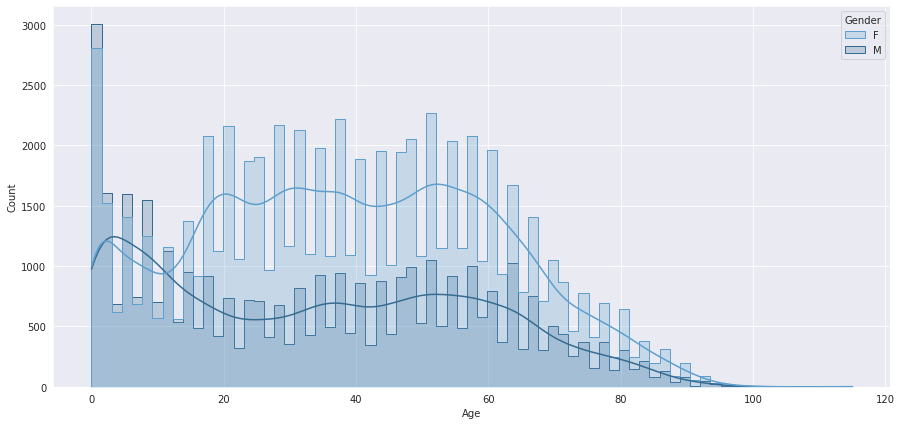

In [25]:
plt.figure(figsize=(15,7))
sns.histplot(x='Age',data=df,kde=True,hue='Gender',element='step',palette='Blues_d');

###### the age of men appear to be the same as that of women but the number of women is biggest than men

###  Age of patients show and no show appointment

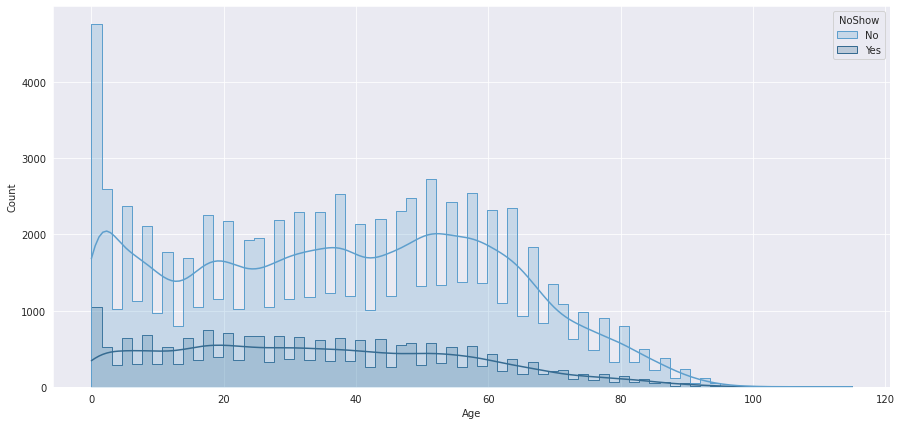

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(x='Age',data=df,kde=True,hue='NoShow',element='step',palette='Blues_d');

###### Age seems to be an important factor to know in order to predict if a patient will show up for their scheduled appointment where middle-aged patients seem less prone not to show up

#### Do all time of scheduled day before appointment day ?

In [27]:
df[df['AppointmentDay']<df['ScheduledDay']]

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,DaysBetweenTowDates,Day,Week
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days,Monday,19
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days,Tuesday,20
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days,Wednesday,18
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days,Thursday,18
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days,Tuesday,18


###### there are five patients not attend the appointment becoause thier schoduled day before appointment day

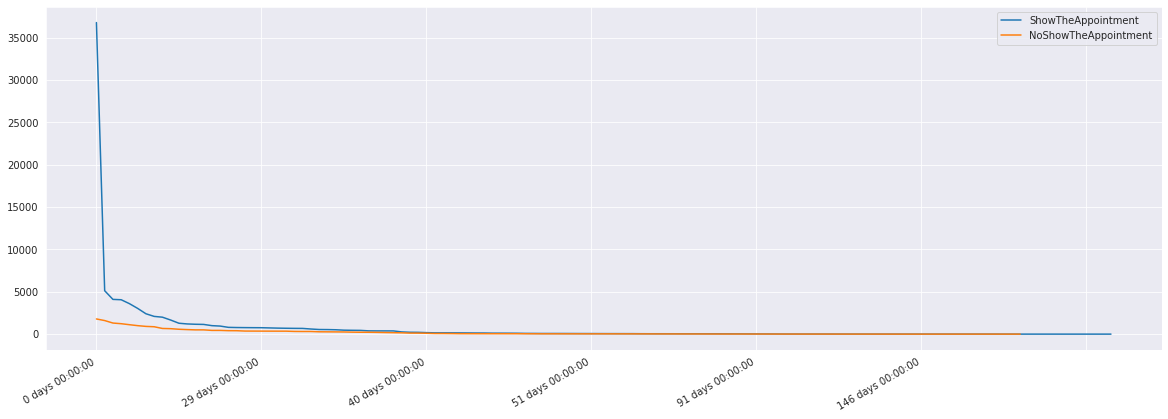

In [28]:
plt.figure(figsize=(20,7))
df[df['NoShow']=='No']['DaysBetweenTowDates'].value_counts().plot(kind='line',label='ShowTheAppointment')
df[df['NoShow']=='Yes']['DaysBetweenTowDates'].value_counts().plot(kind='line',label='NoShowTheAppointment')
plt.legend()

##### patients have had appointment on the same day or week have attended the appointment 
##### patients have had long time like more than 15 days not attended the appointment so we should not give them too long so that they do not wait and have to go to another clinic 

#### day that has more appointment 

<AxesSubplot:xlabel='Day', ylabel='count'>

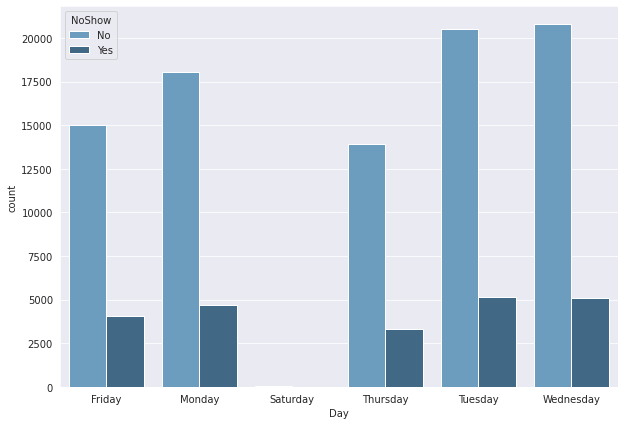

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='Day',data=df,hue='NoShow',palette='Blues_d')

###### saturday is less day for number of appointments

<AxesSubplot:xlabel='Week', ylabel='count'>

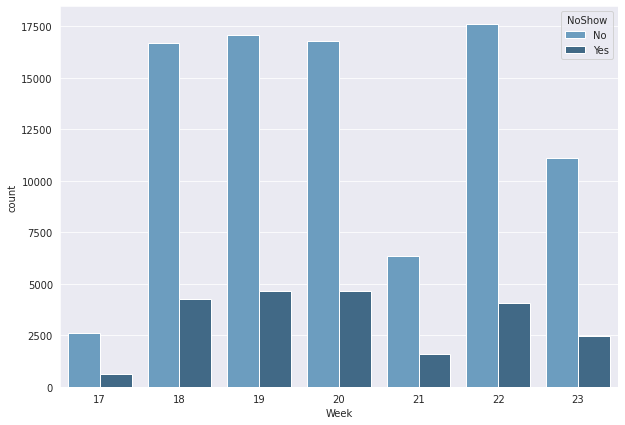

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x='Week',data=df,hue='NoShow',palette='Blues_d')

###### weeks 17 and 21 are less weeks for number of appointments

# conclusion
 
###### -  Woman takes way more care of they health in comparison to man.
###### - Hypertension is factor for higher attendance frequency.
###### - Hypertension is strong feature for affect showing of the patients.
###### - weeks 17 and 21 are less weeks for number of appointments.
###### - Saturday may be holiday because did not have any appointments .
###### - The number of days between the day the patient called or registered the appointment and the day of the actual appointment seem to be an important factor where a low number of days seems to be associated with a lower chance of not showing for the appointment
###### - Handicap column has five different values(0,1,2,3,4) after alot of research I figured out that 1 to 4 is handicapped with difference precentage of the handicap, so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped.
## limitation
###### 1- the project being limited to exploratory data analysis (the absence of machine learning). I could have extracted a lot of human-understandable insights from machine learning models and gained a lot more knowledge in regards to the importance of the variables in relation to the target variable, which would limit any wrong deduction of a cause-and-effect relationship that may happen.
###### 2- distance between the hospital and destination, insurance situation, education level would be helpful for better analysis
###### 3- data collected between 29/4/2016 and 6/6/2016. If data had been collected over a period of more than one year, it would better reflect time-dependent changes
###### 4- doctor's specialty may also be correlated with missed appointment